<a href="https://colab.research.google.com/github/ArjunRameshV/image_processing_for_auv/blob/master/Looking_through_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Key notes ***

Bluring effects like bilateral bluring might help boost performace of thresholding (have to experiment with this) !

In [0]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline 

In [0]:
def display_g(img):
  plt.imshow(img,cmap='gray')
def display(img):
  plt.imshow(img)
def edge_det(img):
  edges = cv2.Canny(dst,100,200)
  display_g(edges)
def show_many(images):
  plt.figure(figsize=(60,40))
  columns = 3
  for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image,cmap='gray')

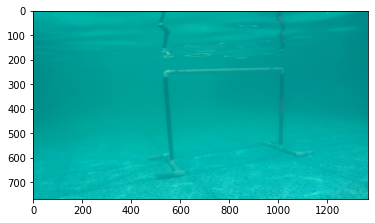

In [4]:
ori_img = cv2.imread("gate2.png")
img = cv2.cvtColor(ori_img,cv2.COLOR_BGR2RGB);
plt.imshow(img)

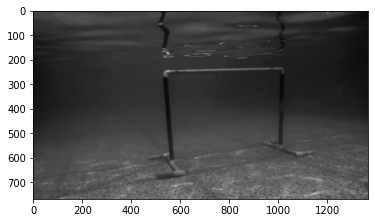

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

seeing the effect of gamma correction on the image

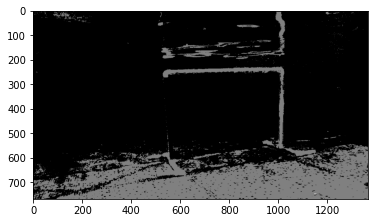

In [24]:
gamma = 1/5
gamma_img = np.power(img,gamma)
gamma_img = np.array(gamma_img,dtype=np.uint16)
gamma_img = cv2.cvtColor(gamma_img,cv2.COLOR_RGB2GRAY)
display_g(gamma_img)

A simple binary thresholding on the original image 


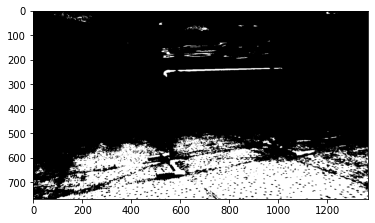

In [27]:
ret1, thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
thrsh1 = thresh1 - gamma_img
display_g(thresh1)

This thresholding ressult was obtained during the thresholding session 

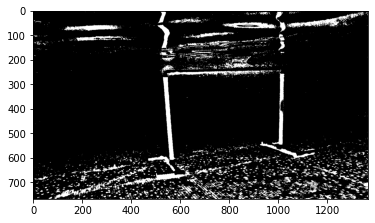

In [36]:
thresh2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,121,4)
display_g(thresh2)

This almost takes care of the bottom part without much distortion on the gate

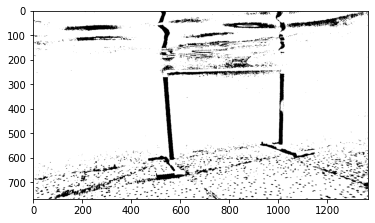

In [38]:
thresh3 = thresh2 - thresh1
rey4,thresh4 = cv2.threshold(thresh3,127,255,cv2.THRESH_BINARY_INV)
display_g(thresh4)

Tryig out various combinations of gamma to get a darker image

Result might come in handy during direct edge detection filters as the image seems more dense

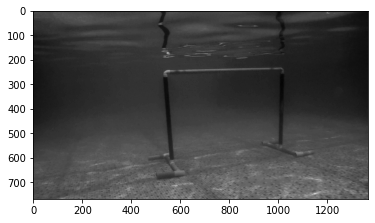

In [44]:
gamma = 1.2
gamma_img = np.power(img,gamma)
gamma_img = np.array(gamma_img,dtype=np.uint16)
gamma_img = cv2.cvtColor(gamma_img,cv2.COLOR_RGB2GRAY)
display_g(gamma_img)

#Trying out some smoothing techniques

In [0]:
kernel = np.ones(shape=(5,5),dtype=np.uint16)/2.5

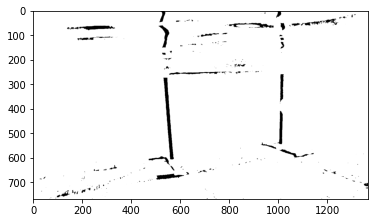

In [59]:
dst = cv2.filter2D(thresh4,-1,kernel)
display_g(dst)

the image obtained from the previous notebook on thresholding

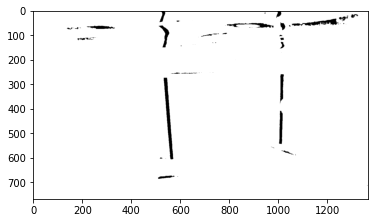

In [62]:
ret1, new1 = cv2.threshold(gray,120,240,cv2.THRESH_TRUNC)
# display_g(new1)
new3 = cv2.adaptiveThreshold(new1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,151,4)
display_g(new3)
gaus_img = cv2.GaussianBlur(new3,(3,3),0.5)
# display_g(gaus_img)
dst2 = cv2.filter2D(gaus_img,-1,kernel)
display_g(dst2)

Seems a good option for now ( subtracting the base of the image from the gary scale, possible thing to see if the top reflection can also be removed and can a video actually handle the computation )

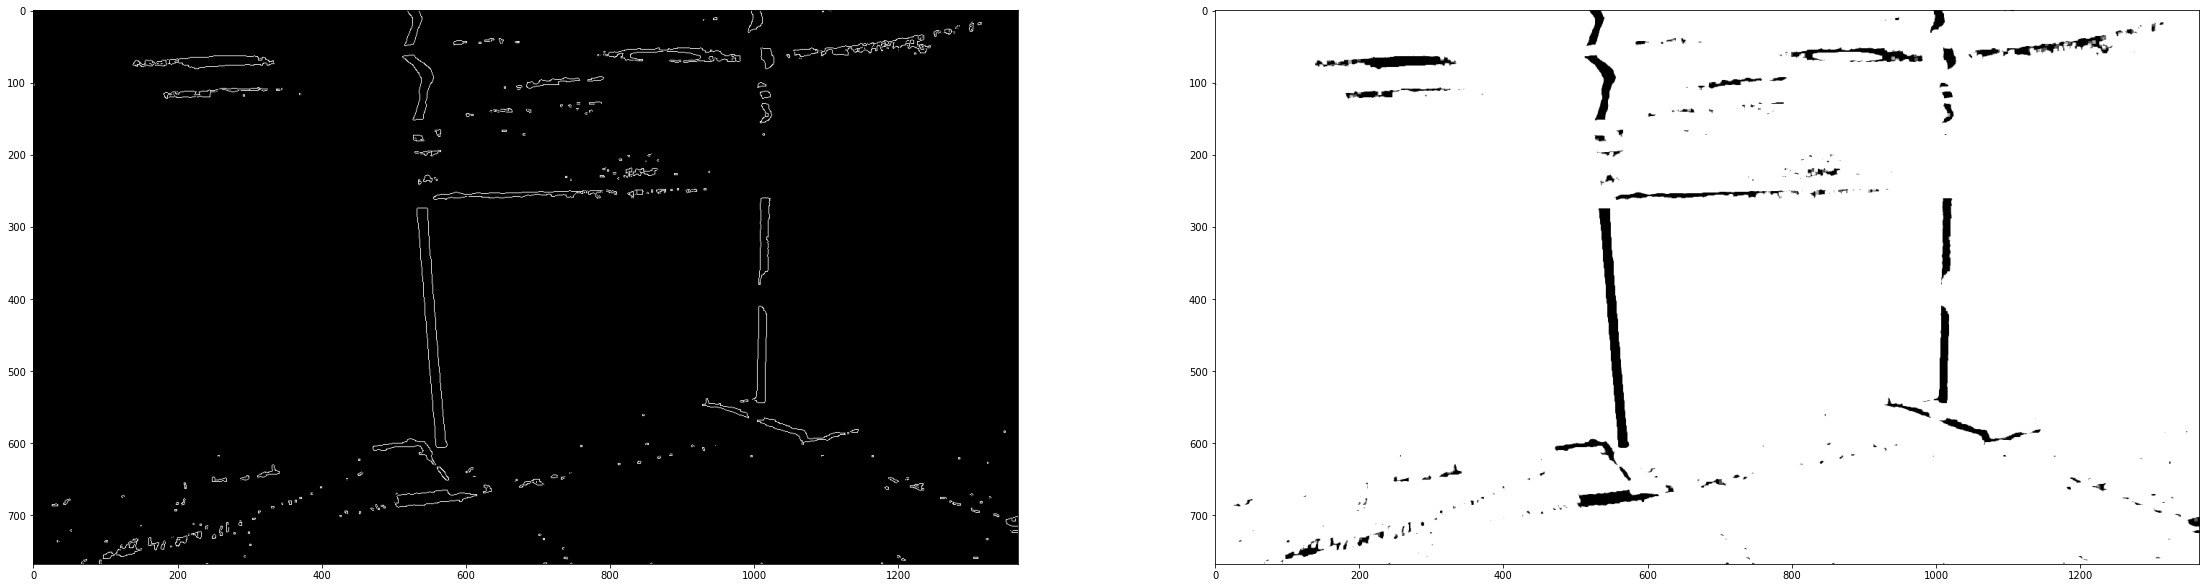

In [83]:
edges = cv2.Canny(dst,100,200)
# display_g(edges)
show_many([edges,dst])

The inbuilt blurring functions 

Gate seems clear but not suffciently clear enough to detect 

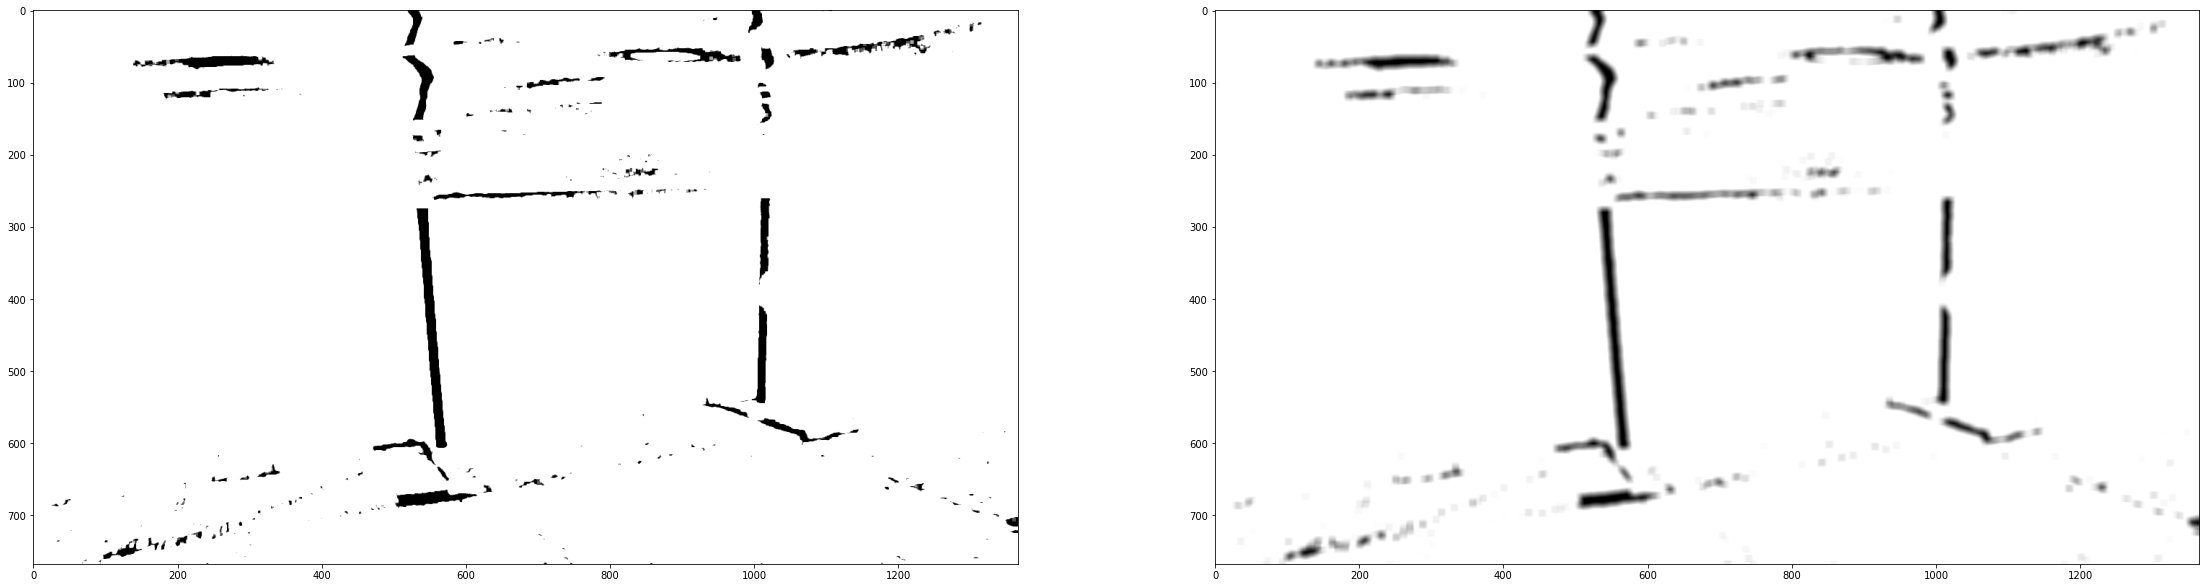

In [85]:
blur2 = cv2.blur(dst,ksize=(10,10))
show_many([dst,blur2])

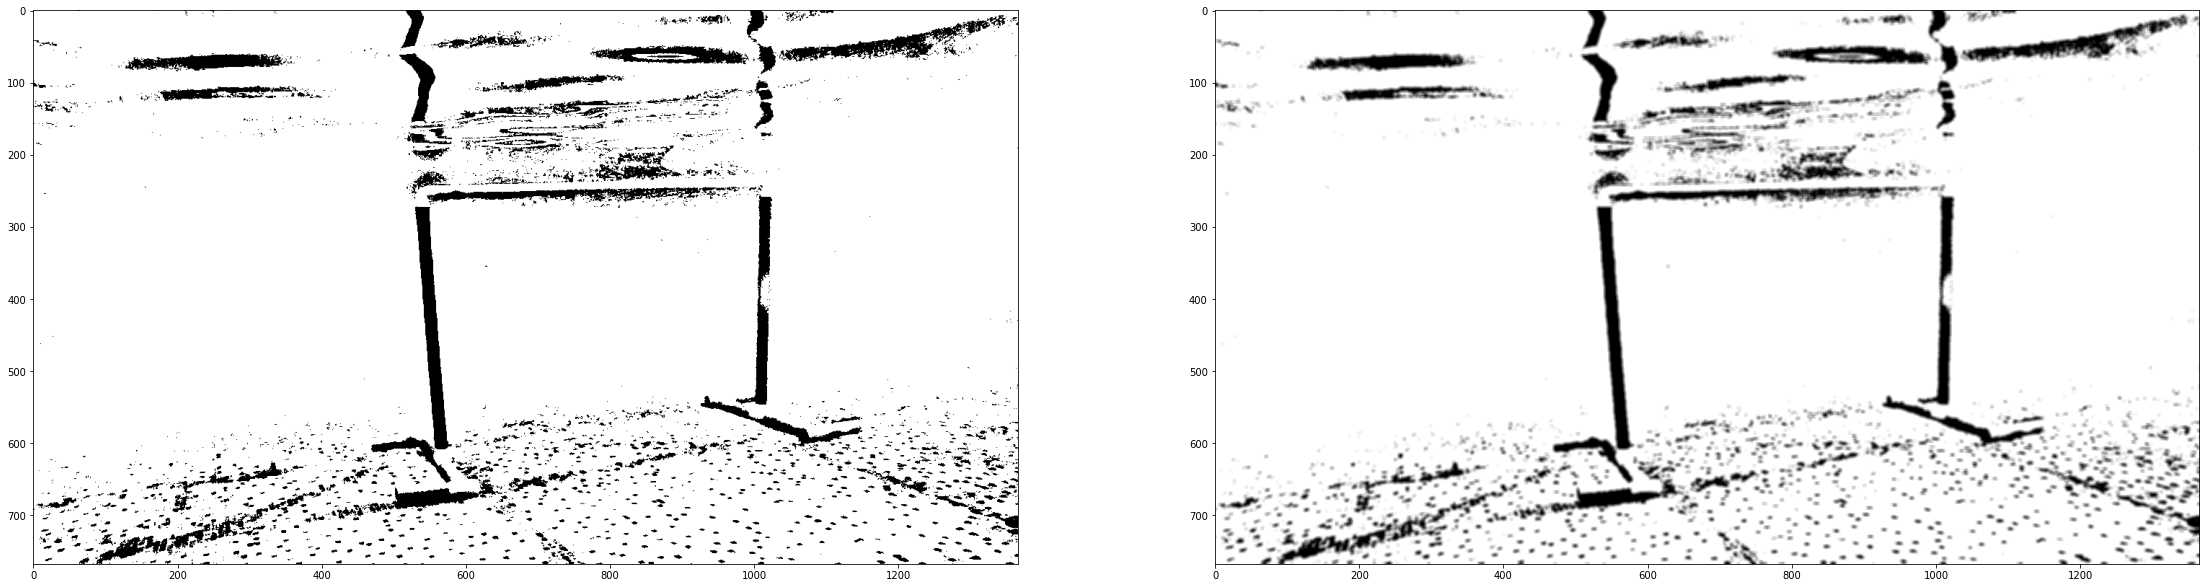

In [87]:
gausy_blur = cv2.GaussianBlur(thresh4,(5,5),10)
show_many([thresh4,gausy_blur])

Trying to remove some noise on thresh4 and others using median blur

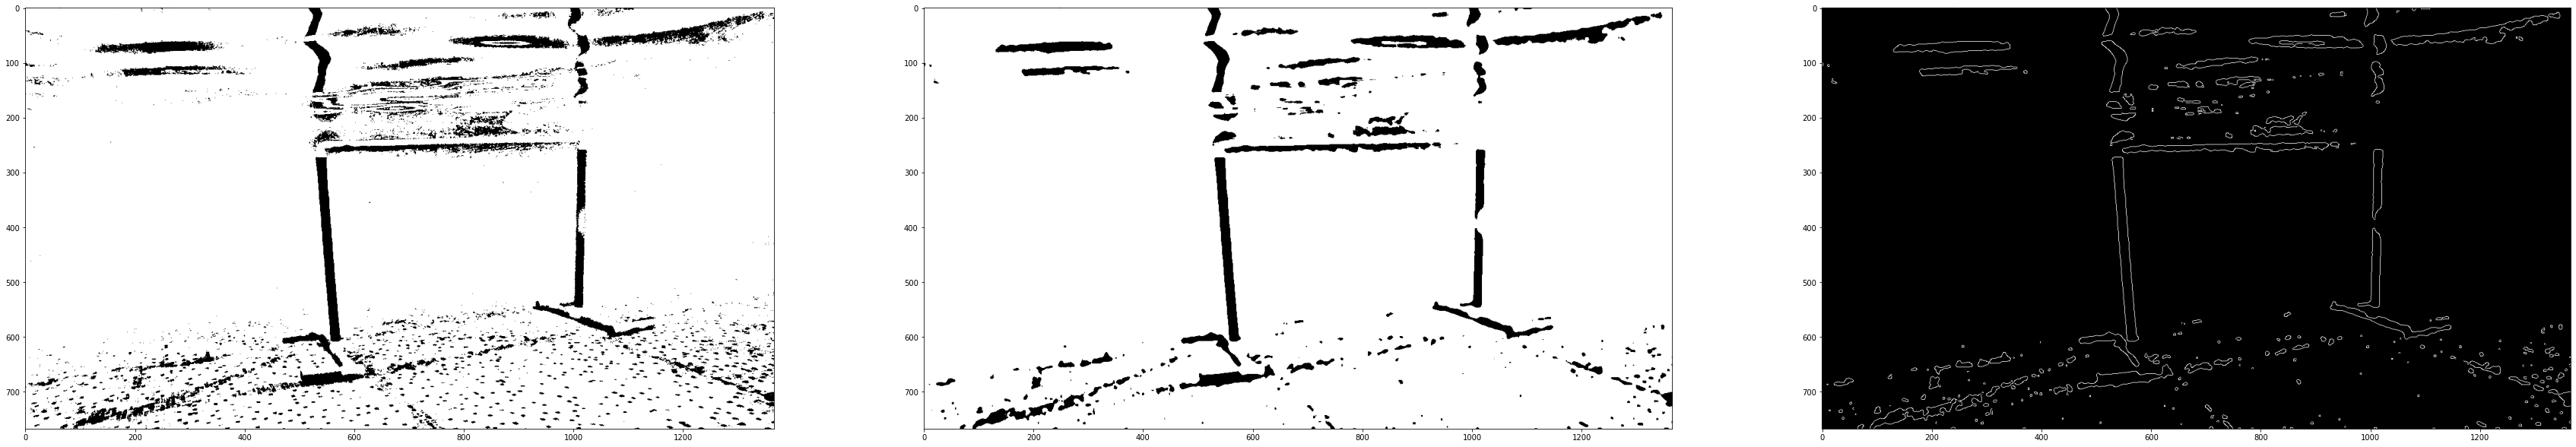

In [97]:
med_blur = cv2.medianBlur(thresh4,7)
med_blur_edge = cv2.Canny(med_blur,100,200)
show_many([thresh4,med_blur,med_blur_edge])

Trting out bilateral filter blur (though may not be supported due to bad speed)

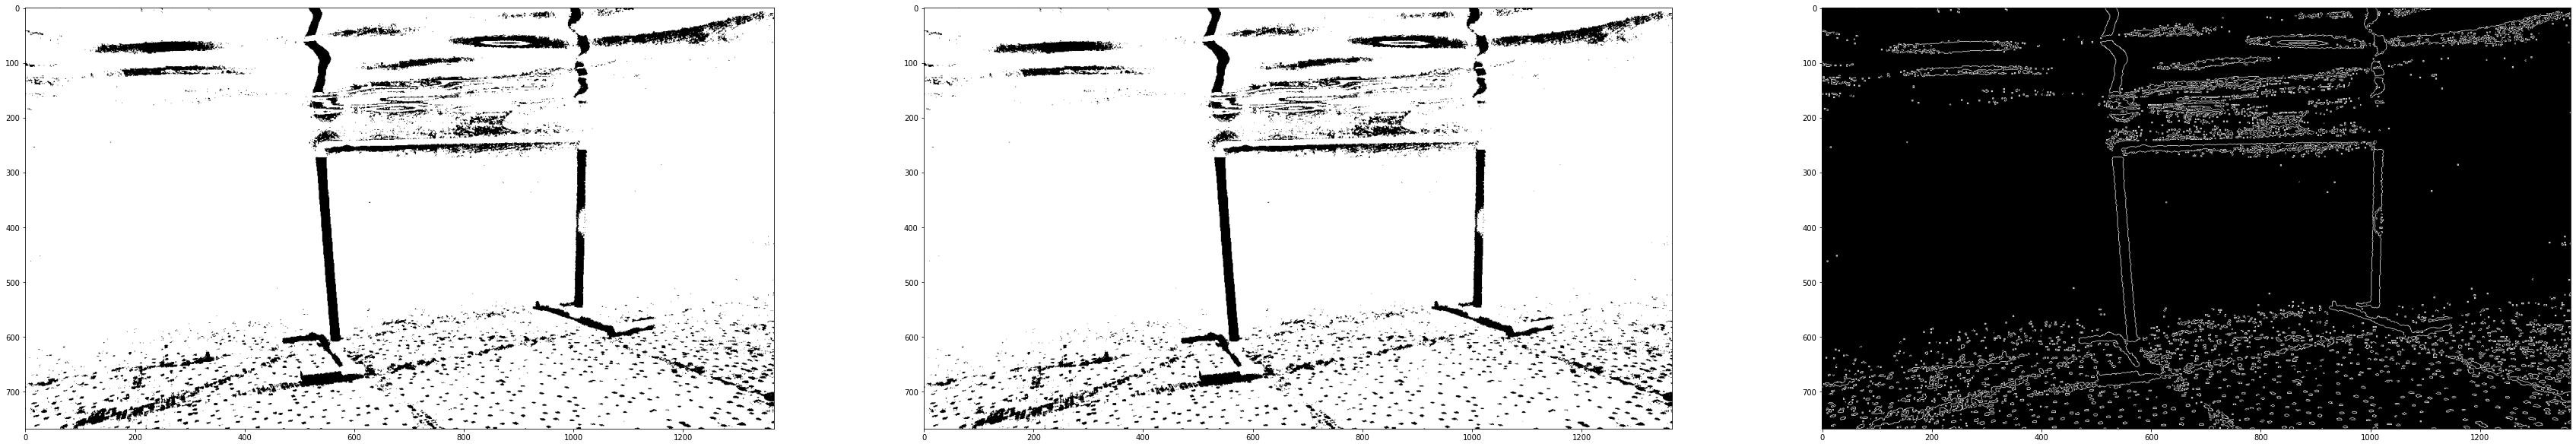

In [103]:
bi_blur = cv2.bilateralFilter(thresh4,15,75,75)
bi_blur_edge = cv2.Canny(bi_blur,100,200)
show_many([thresh4,bi_blur,bi_blur_edge])

# New Section